In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv('dataset 1.csv')

In [24]:
df.dropna(inplace=True)
df.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


##  Understanding Subplots

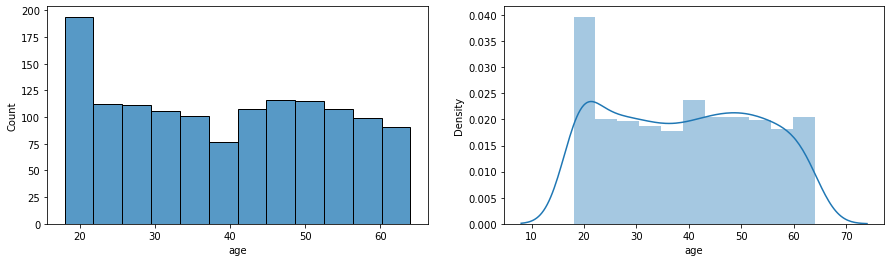

In [4]:
fig=plt.figure(figsize=(15,4)) #creating an outlay 
ax=fig.add_subplot(1,2,1)  #1st digit represents no. of rows in the canvas,2nd digit represents no. of columns and 3rd is for the index of the plot
sns.histplot(df['age'])
ax=fig.add_subplot(1,2,2)
sns.distplot(df['age'])
plt.show()

In [5]:
#1.dist plot of age,2.dist plot of bmi 3.dist plot of charges in INR

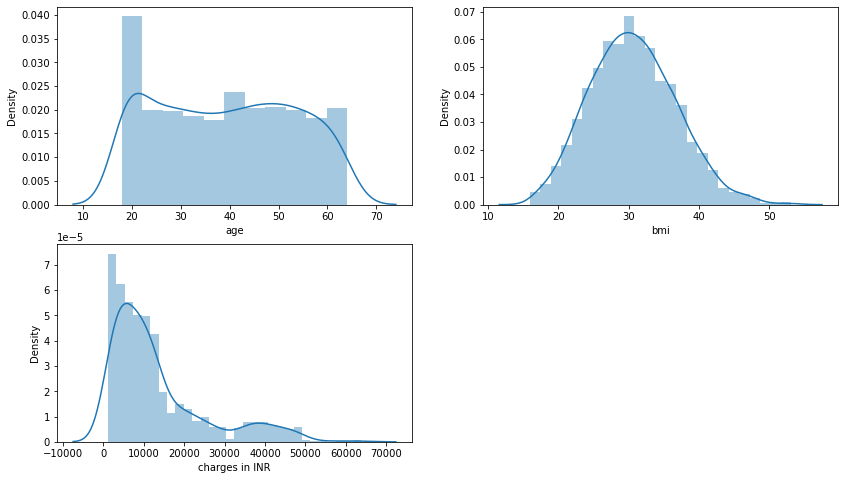

In [6]:
fig=plt.figure(figsize=(14,8)) 
ax=fig.add_subplot(2,2,1)   
sns.distplot(df['age'])
ax=fig.add_subplot(2,2,2)
sns.distplot(df['bmi'])
ax=fig.add_subplot(2,2,3)
sns.distplot(df['charges in INR'])
plt.show()

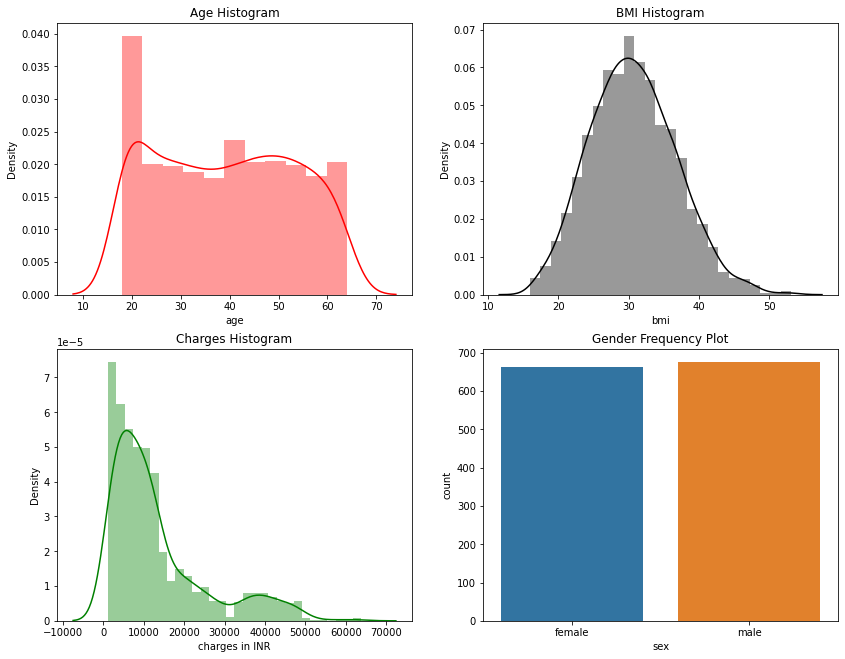

In [7]:
fig=plt.figure(figsize=(14,11)) 
ax=fig.add_subplot(2,2,1)  
sns.distplot(df['age'],color='r').set_title('Age Histogram')
ax=fig.add_subplot(2,2,2)
sns.distplot(df['bmi'],color='black').set_title('BMI Histogram')
ax=fig.add_subplot(2,2,3)
sns.distplot(df['charges in INR'],color='g').set_title('Charges Histogram')
ax=fig.add_subplot(2,2,4)
sns.countplot(df['sex']).set_title('Gender Frequency Plot')
plt.show()

##  Outlier Detection
    -1.Box plot/Whisker plot
    -2.Scatter Plot
    -3.Z score,emperical rule(data points beyond +/- 3 std dev are considered as outliers)
    -4.IQR(Inter quartile range)

<AxesSubplot:xlabel='age'>

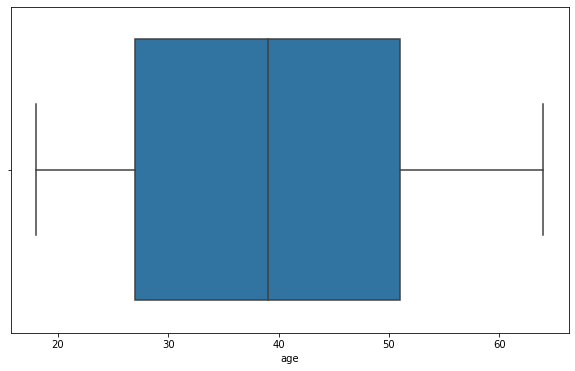

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(df['age'])

<AxesSubplot:xlabel='bmi'>

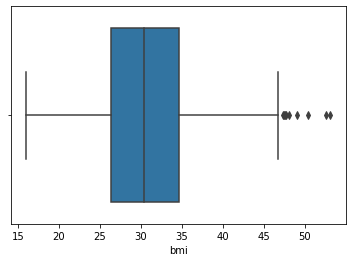

In [9]:
#plt.figure(figsize=(10,6))
sns.boxplot(df['bmi'])

<AxesSubplot:xlabel='charges in INR'>

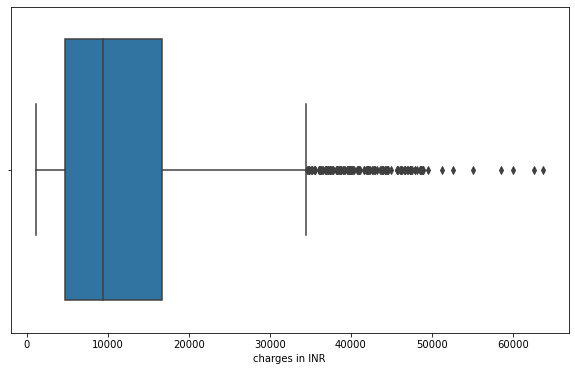

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(df['charges in INR'])

<AxesSubplot:xlabel='charges in INR', ylabel='Density'>

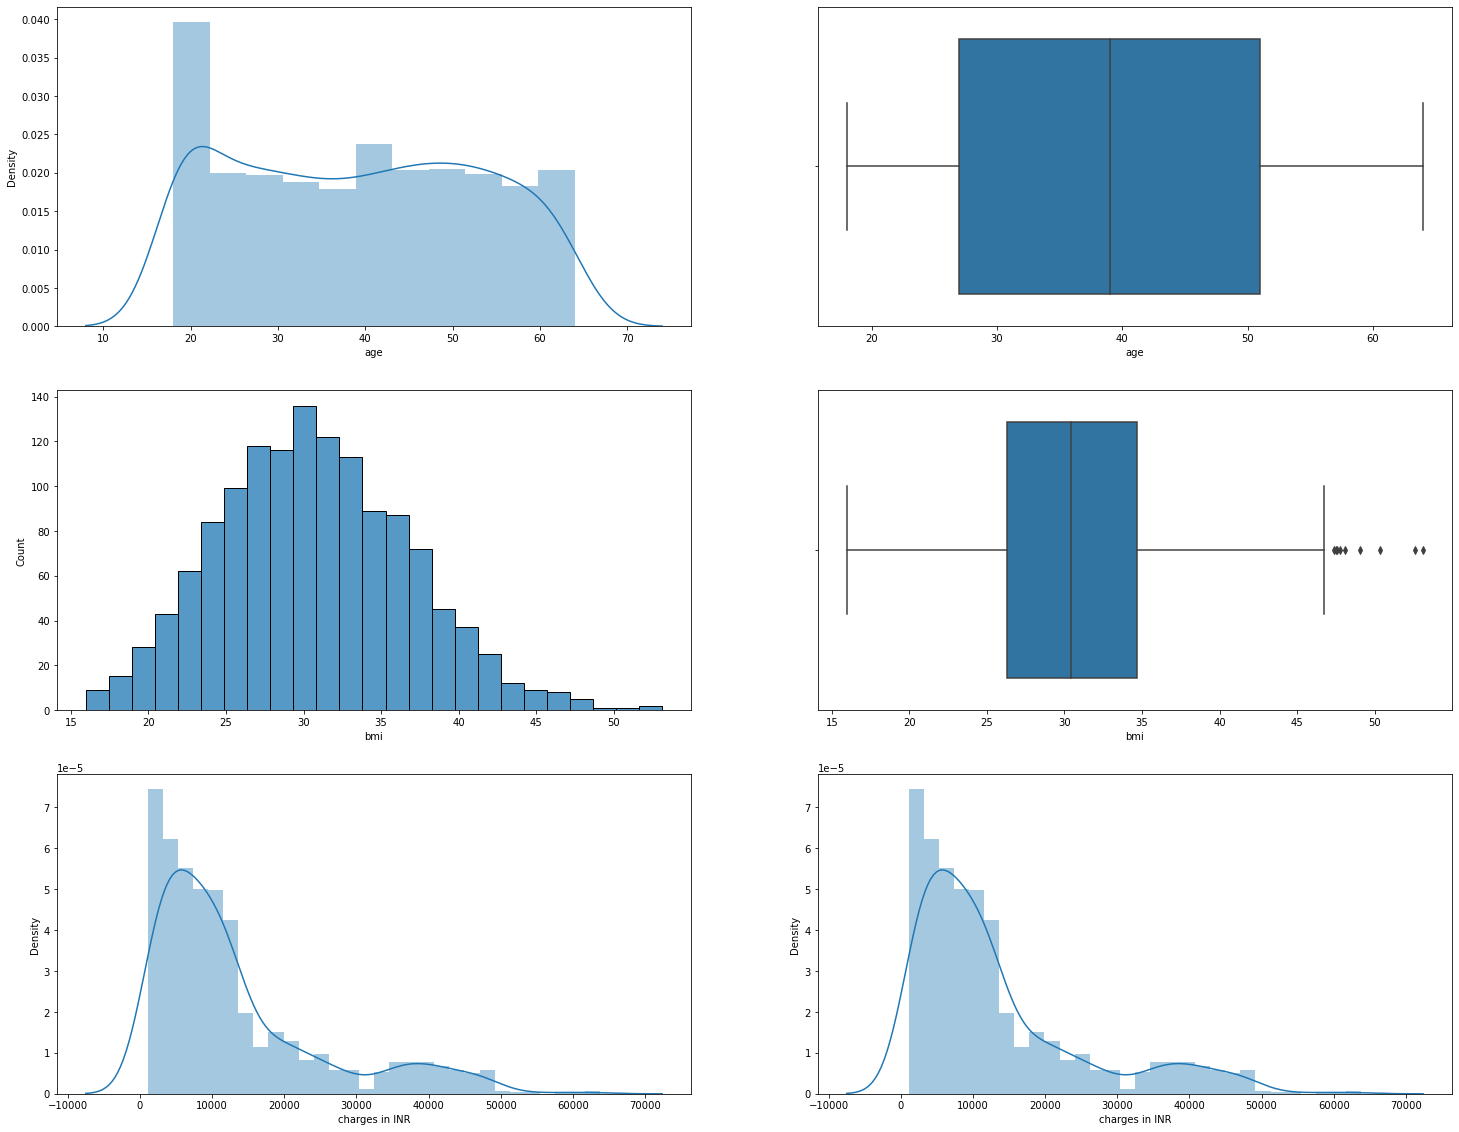

In [11]:
fig=plt.figure(figsize=(25,20))
ax=fig.add_subplot(3,2,1)
sns.distplot(df['age'])
ax=fig.add_subplot(3,2,2)
sns.boxplot(df['age'])
ax=fig.add_subplot(3,2,3)
sns.histplot(df['bmi'])
ax=fig.add_subplot(3,2,4)
sns.boxplot(df['bmi'])
ax=fig.add_subplot(3,2,5)
sns.distplot(df['charges in INR'])
ax=fig.add_subplot(3,2,6)
sns.distplot(df['charges in INR'])

###  Detecting ouliers using IQR

,Policy no.,age,sex,bmi,charges in INR
116,PLC157942,58,male,49.06,11381.32540
286,PLC159472,46,female,48.07,9432.92530
401,PLC160507,47,male,47.52,8083.91980
543,PLC161785,54,female,47.41,63770.42801
847,PLC164521,23,male,50.38,2438.05520
860,PLC164638,37,female,47.60,46113.51100
1047,PLC166321,22,male,52.58,44501.39820
1088,PLC166690,52,male,47.74,9748.91060
1317,PLC168751,18,male,53.13,1163.46270


<AxesSubplot:xlabel='bmi'>

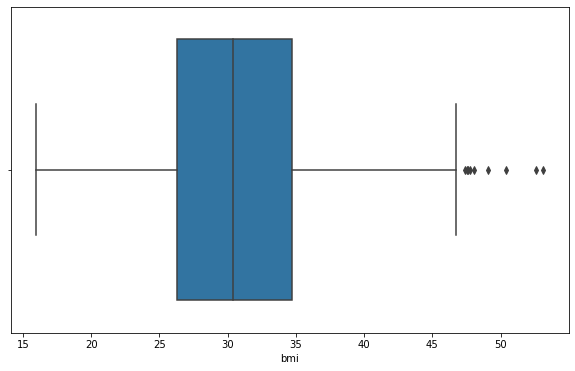

In [12]:
col='bmi'
q1=df[col].quantile(0.25)
q3=df[col].quantile(0.75)
IQR=q3-q1
display((df.loc[(df[col]<(q1-1.5*IQR)) | (df[col]>(q3+1.5*IQR))]))
plt.figure(figsize=(10,6))
sns.boxplot(df[col])

In [13]:
df['bmi'].skew() #not v skewed so replacement with mean or median

0.2840471105987448

### Outlier Treatment

In [19]:
def replace_outlier(mydf1,col):
    q1=mydf1[col].quantile(0.25)
    q2=mydf1[col].quantile(0.5)
    q3=mydf1[col].quantile(0.75)
    IQR=q3-q1
    LW=q1-(1.5*IQR)
    UW=q3+(1.5*IQR)
    mydf1.loc[mydf1[col]<LW,col]=q2
    mydf1.loc[mydf1[col]>UW,col]=q2
    return mydf1

In [20]:
def odt_plots(mydf1,col):
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(25,8))
    sns.boxplot(mydf1[col],ax=ax1)
    ax1.set_title(col+' boxplot')
    ax1.set_xlabel('boxplot')
    ax1.set_ylabel('values')
    
    mydf1_out=replace_outlier(mydf1,col)
    sns.boxplot(mydf1_out[col],ax=ax2)
    ax2.set_title(col+' boxplot')
    ax2.set_xlabel('boxplot')
    ax2.set_ylabel('values')
    plt.show()

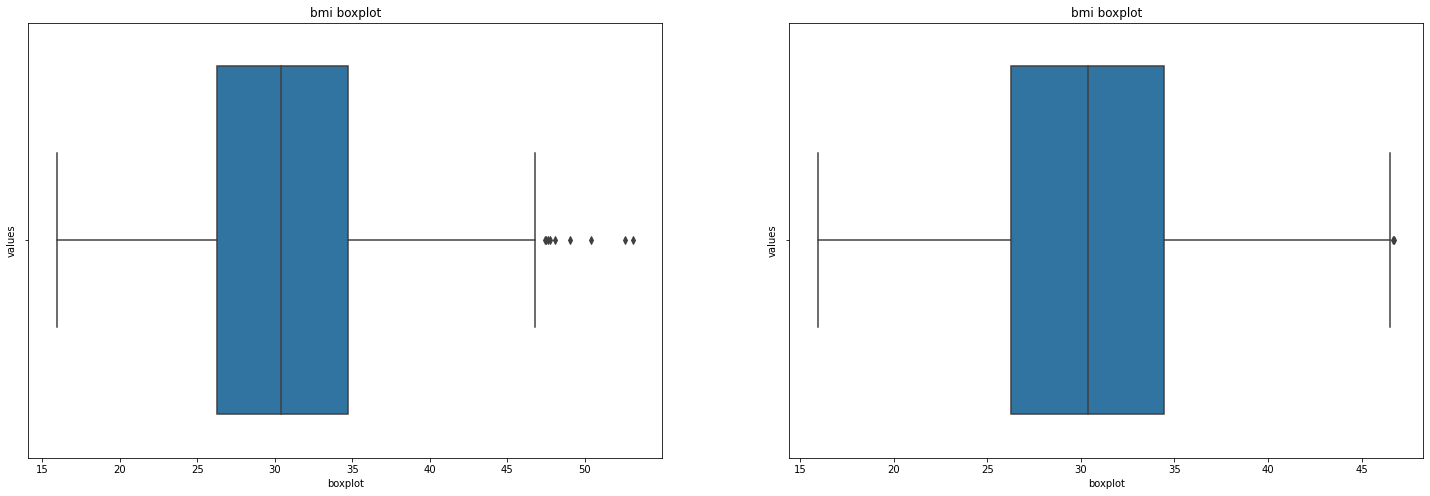

In [21]:
odt_plots(df,'bmi')

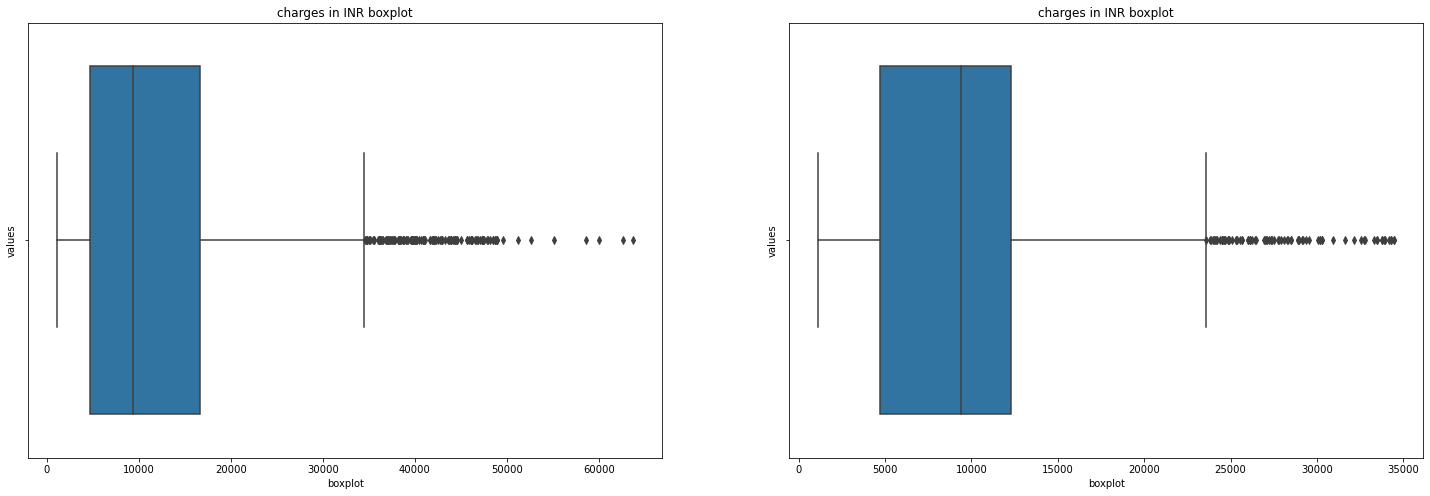

In [22]:
odt_plots(df,'charges in INR')

###  2nd method of outlier treatment 

In [4]:
def replace_outlier2(mydf2,col):
    q1=mydf2[col].quantile(0.25)
    q2=mydf2[col].quantile(0.5)
    q3=mydf2[col].quantile(0.75)
    IQR=q3-q1
    LW=q1-(1.5*IQR)
    UW=q3+(1.5*IQR)
    mydf2.loc[mydf2[col]<LW,col]=q1
    mydf2.loc[mydf2[col]>UW,col]=q3
    return mydf2

In [5]:
def odt_plots2(mydf2,col):
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(25,8))
    sns.boxplot(mydf2[col],ax=ax1)
    ax1.set_title(col+' boxplot')
    ax1.set_xlabel('boxplot')
    ax1.set_ylabel('values')
    
    mydf2_out=replace_outlier2(mydf2,col)
    sns.boxplot(mydf2_out[col],ax=ax2)
    ax2.set_title(col+' boxplot')
    ax2.set_xlabel('boxplot')
    ax2.set_ylabel('values')
    plt.show()

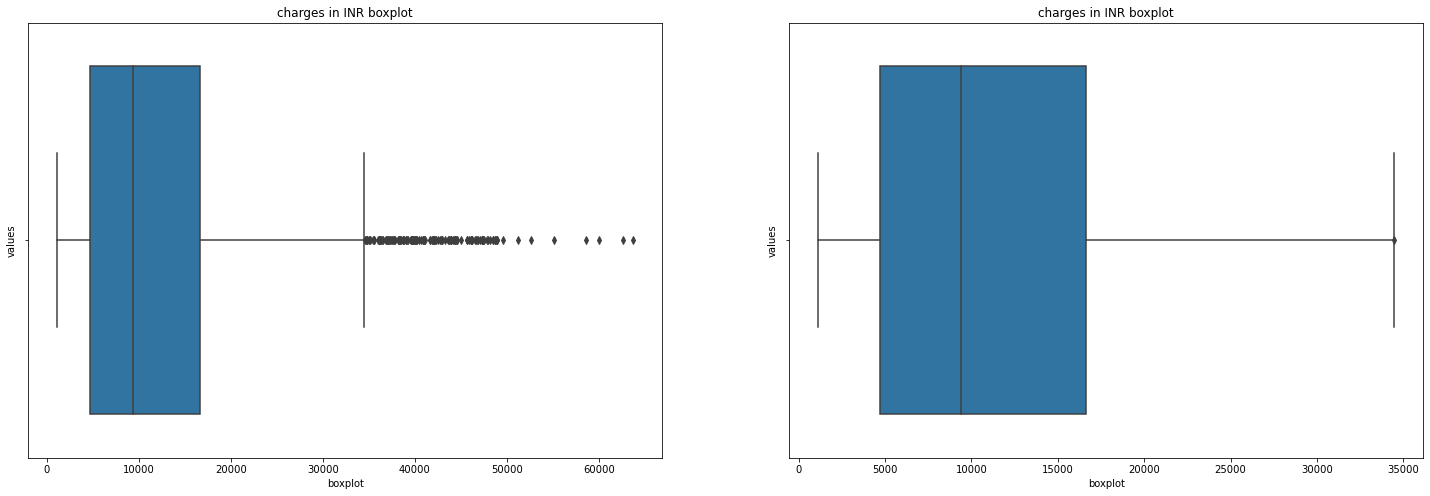

In [6]:
odt_plots2(df,'charges in INR')

In [25]:
def replace_outlier3(mydf3,col):
    q1=mydf3[col].quantile(0.25)
    q2=mydf3[col].quantile(0.5)
    q3=mydf3[col].quantile(0.75)
    IQR=q3-q1
    LW=q1-(1.5*IQR)
    UW=q3+(1.5*IQR)
    mean=mydf3[col].mean()
    mydf3.loc[mydf3[col]<LW,col]=mean
    mydf3.loc[mydf3[col]>UW,col]=mean
    return mydf3

In [26]:
def odt_plots3(mydf3,col):
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(25,8))
    sns.boxplot(mydf3[col],ax=ax1)
    ax1.set_title(col+' boxplot')
    ax1.set_xlabel('boxplot')
    ax1.set_ylabel('values')
    
    mydf3_out=replace_outlier3(mydf3,col)
    sns.boxplot(mydf3_out[col],ax=ax2)
    ax2.set_title(col+' boxplot')
    ax2.set_xlabel('boxplot')
    ax2.set_ylabel('values')
    plt.show()

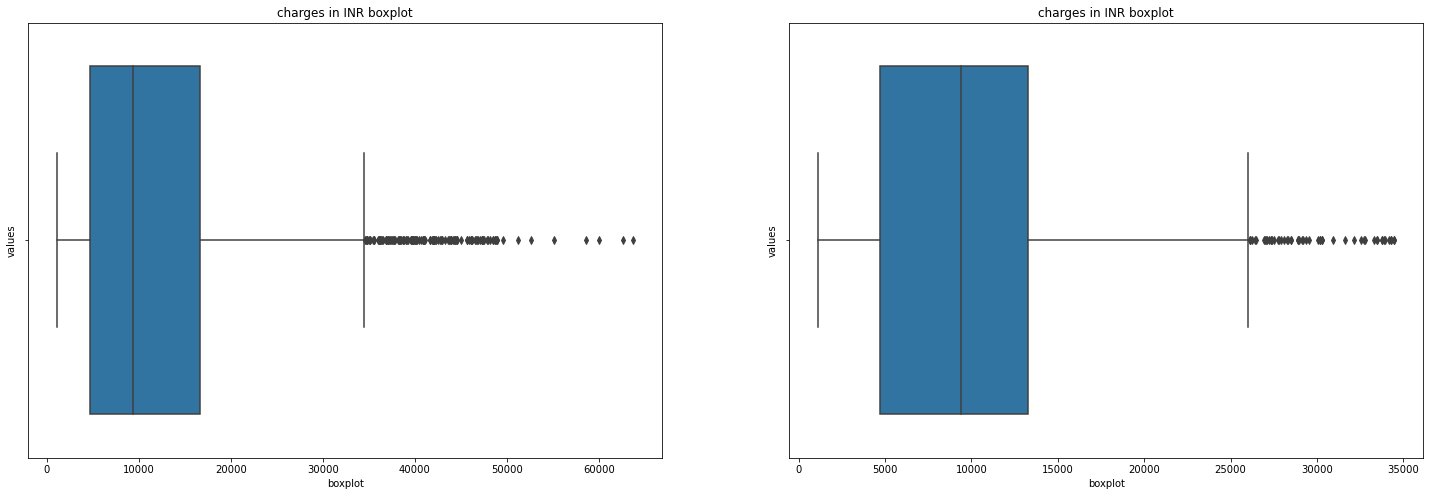

In [27]:
odt_plots3(df,'charges in INR')

In [30]:
newlowerlimit=df['charges in INR'].mean()-(3*df['charges in INR'].std())
newupperlimit=df['charges in INR'].mean()+(3*df['charges in INR'].std())

In [31]:
newlowerlimit

-10514.80244425372

In [33]:
newupperlimit

31064.824901658183